# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
#import sys
#sys.path.pop(0)

'/Users/gks/Dropbox/mypylib/notebooks/GIT'

# Lets import our package 

In [2]:
import rmfit
rmfit

<module 'rmfit' from '/Users/gks/opt/anaconda2/envs/py36/lib/python3.6/site-packages/rmfit-0.1.0-py3.6.egg/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [3]:
# Data from
# Albrecht et al. 2012
# https://ui.adsabs.harvard.edu/abs/2012ApJ...757...18A/abstract
df = pd.read_csv('../data/example/01_hatp2/albrecht2012.csv',comment='#',sep=';')
df.name.unique()
df = df[df.name=='HAT-P-2'].reset_index(drop=True)
df

,name,bjd,rv,f_RVel,e_rv,inst
0,HAT-P-2,2.454258e+06,107.29,NaN,11.47,HIRES
1,HAT-P-2,2.454258e+06,113.38,NaN,11.27,HIRES
2,HAT-P-2,2.454258e+06,102.73,NaN,11.29,HIRES
3,HAT-P-2,2.454258e+06,73.36,NaN,11.12,HIRES
4,HAT-P-2,2.454258e+06,72.43,NaN,10.98,HIRES
...,...,...,...,...,...,...
92,HAT-P-2,2.454258e+06,-278.41,NaN,10.80,HIRES
93,HAT-P-2,2.454258e+06,-297.41,NaN,10.85,HIRES
94,HAT-P-2,2.454258e+06,-350.56,NaN,11.02,HIRES
95,HAT-P-2,2.454258e+06,-352.35,NaN,11.08,HIRES


Text(0, 0.5, 'RV [m/s]')

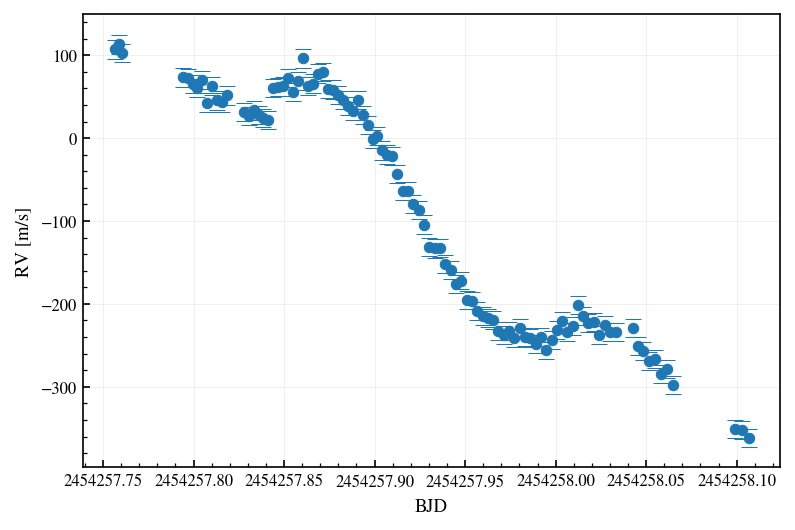

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [5]:
f = '../data/example/01_hatp2/hatp2_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/01_hatp2/hatp2_priors.dat
   prior          arg1       arg2     label description priortype  fixed
0     NP  2.454213e+06    0.00060     t0_p1       t0_p1     model  False
1     NP  5.633410e+00    0.00013      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.00000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.00000     vsini       vsini     model  False
4     UP  8.500000e+01   90.00000    inc_p1      inc_p1     model  False
5     NP  7.227000e-02    0.00070      p_p1        p_p1     model  False
6     NP  9.000000e+00    3.00000      a_p1        a_p1     model  False
7     NP  3.000000e-01    0.05000        u1          u1     model  False
8     NP  3.000000e-01    0.05000        u2          u2     model  False
9     NP  5.010000e-01    0.00700    ecc_p1      ecc_p1     model  False
10    NP -1.726000e+02    1.60000  omega_p1    omega_p1     model  False
11    NP  5.200000e+00    0.50000     vbeta       vbeta 

In [6]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454213e+06  2.454213e+06  2.454213e+06  2.454213e+06    -0.000033
1       P_p1  5.633410e+00  5.632760e+00  5.634060e+00  5.633404e+00     0.000006
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  1.194954e+01   -11.949544
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.620316e+01    -1.203158
4     inc_p1  8.750000e+01  8.500000e+01  9.000000e+01  8.915267e+01    -1.652672
5       p_p1  7.227000e-02  6.877000e-02  7.577000e-02  7.226366e-02     0.000006
6       a_p1  9.000000e+00 -6.000000e+00  2.400000e+01  1.042186e+01    -1.421856
7         u1  3.000000e-01  5.000000e-02  5.500000e-01  3.332043e-01    -0.033204
8         u2  3.000000e-01  5.000000e-02  5.500000e-01  3.122333e-01    -0.012233
9     ecc_p1  5.010000e-01  4.660000e-01  5.360000e-01  4.966613e-01     0.004339
10  omega_p1 -1.726000e+02 -1.806000

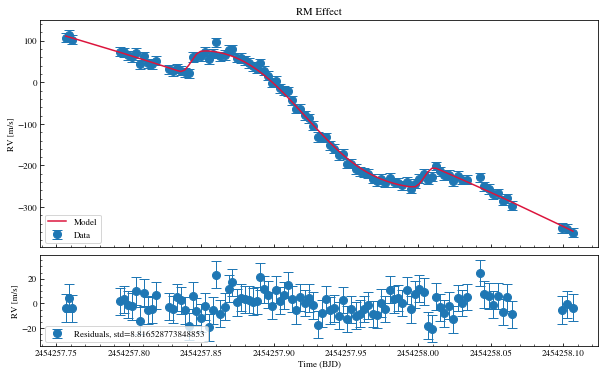

In [7]:
# plot best-fit
TF.plot_fit(TF.min_pv)

In [8]:
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Reading in priorfile from ../data/example/01_hatp2/hatp2_priors.dat
   prior          arg1       arg2     label description priortype  fixed
0     NP  2.454213e+06    0.00060     t0_p1       t0_p1     model  False
1     NP  5.633410e+00    0.00013      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.00000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.00000     vsini       vsini     model  False
4     UP  8.500000e+01   90.00000    inc_p1      inc_p1     model  False
5     NP  7.227000e-02    0.00070      p_p1        p_p1     model  False
6     NP  9.000000e+00    3.00000      a_p1        a_p1     model  False
7     NP  3.000000e-01    0.05000        u1          u1     model  False
8     NP  3.000000e-01    0.05000        u2          u2     model  False
9     NP  5.010000e-01    0.00700    ecc_p1      ecc_p1     model  False
10    NP -1.726000e+02    1.60000  omega_p1    omega_p1     model  False
11    NP  5.200000e+00    0.50000     vbeta       vbeta 

No flatchain passed, defaulting to using full chains
Plotting curve with best-fit mcmc values


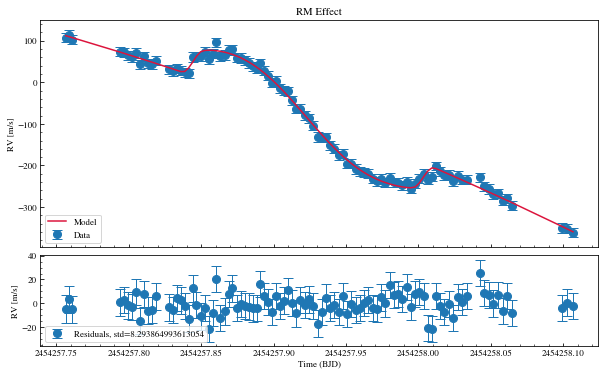

In [9]:
# Plot the MCMC fit
TF.plot_mcmc_fit()

In [10]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([ 2.45421286e+06,  5.63342313e+00,  5.94145185e+00,  1.70292962e+01,
        8.86783798e+01,  7.21828163e-02,  1.04208552e+01,  3.56562844e-01,
        3.31947429e-01,  4.95650651e-01, -1.70112790e+02,  5.04799400e+00,
        9.26250593e+02,  3.69836897e+02])

## Plot chains 

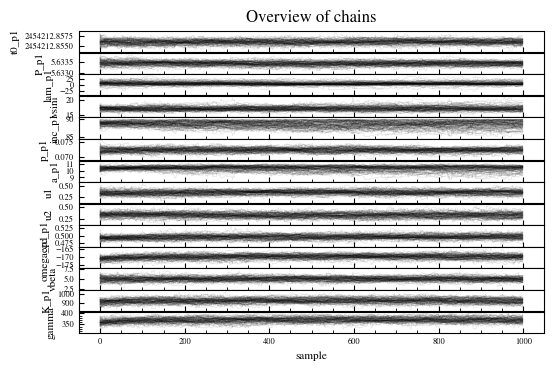

In [11]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [12]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,ecc_p1,omega_p1,vbeta,K_p1,gamma
0,2.454213e+06,5.633492,9.192972,17.050719,88.461978,0.073078,10.348917,0.395076,0.372904,0.500361,-168.957533,5.673253,940.351060,379.059949
1,2.454213e+06,5.633492,9.192972,17.050719,88.461978,0.073078,10.348917,0.395076,0.372904,0.500361,-168.957533,5.673253,940.351060,379.059949
2,2.454213e+06,5.633492,9.192972,17.050719,88.461978,0.073078,10.348917,0.395076,0.372904,0.500361,-168.957533,5.673253,940.351060,379.059949
3,2.454213e+06,5.633492,9.192972,17.050719,88.461978,0.073078,10.348917,0.395076,0.372904,0.500361,-168.957533,5.673253,940.351060,379.059949
4,2.454213e+06,5.633529,9.918965,17.000982,88.173936,0.073336,10.316808,0.394565,0.385264,0.498459,-168.774219,5.722095,946.295261,380.450841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2.454213e+06,5.633583,10.261541,17.150256,87.857409,0.072064,10.159870,0.395968,0.366265,0.502597,-169.639926,4.544287,938.126236,382.213280
79996,2.454213e+06,5.633583,10.261541,17.150256,87.857409,0.072064,10.159870,0.395968,0.366265,0.502597,-169.639926,4.544287,938.126236,382.213280
79997,2.454213e+06,5.633575,10.242591,17.133681,87.940090,0.072083,10.177404,0.393465,0.365488,0.501904,-169.648931,4.575051,937.206806,381.015172
79998,2.454213e+06,5.633575,10.242591,17.133681,87.940090,0.072083,10.177404,0.393465,0.365488,0.501904,-169.648931,4.575051,937.206806,381.015172


In [13]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.15691113, 1.14957443, 1.19755352, 1.24776564, 1.27349844,
       1.16508078, 1.26123302, 1.14136974, 1.16051731, 1.14995061,
       1.15609917, 1.15360947, 1.16282529, 1.16280444])

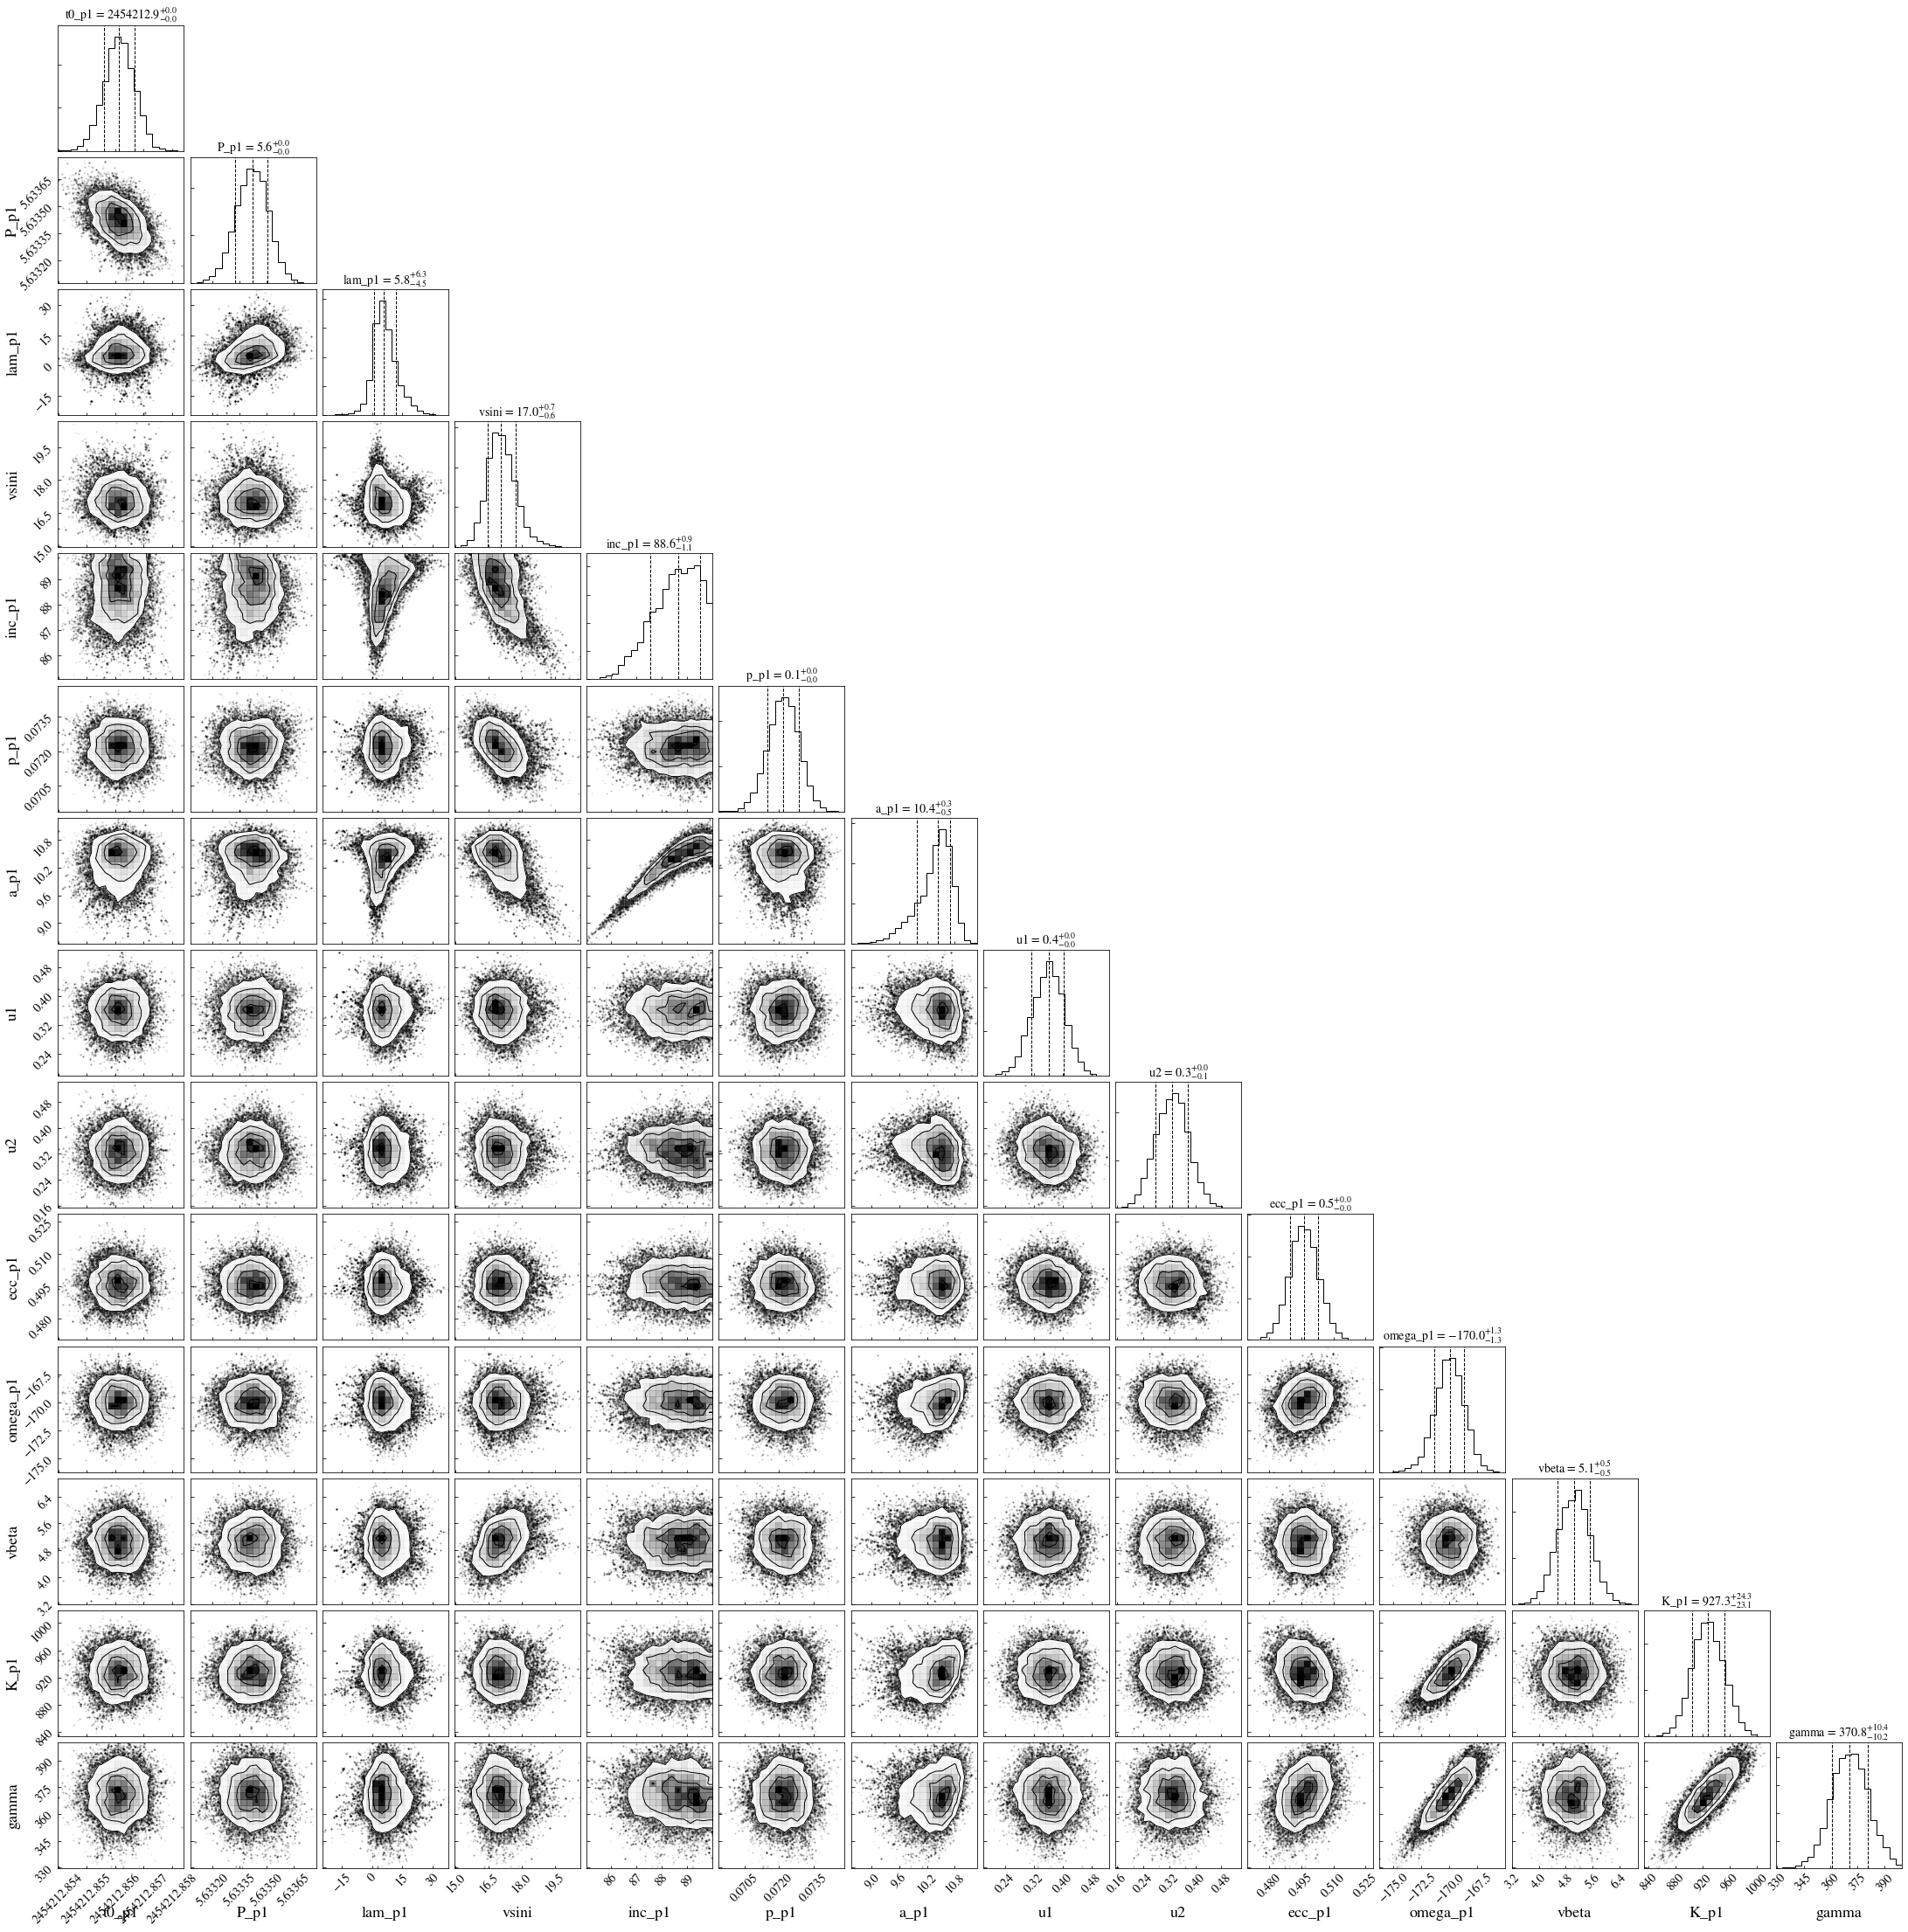

In [14]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

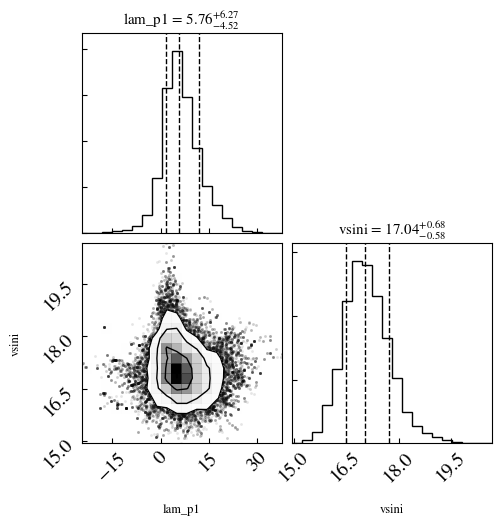

In [15]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])
fig.dpi=100

In [16]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454213e+06,0.000522,0.000545,$2454212.85613_{-0.00052}^{+0.00054}$,t0_p1,t0_p1
0,5.633419e+00,0.000093,0.000087,$5.633419_{-0.00009}^{+0.00009}$,P_p1,P_p1
0,5.756769e+00,4.523654,6.270227,$5.8_{-4.5}^{+6.3}$,lam_p1,lam_p1
0,1.703756e+01,0.577123,0.679124,$17.04_{-0.58}^{+0.68}$,vsini,vsini
0,8.863801e+01,1.086710,0.859442,$88.64_{-1.1}^{+0.86}$,inc_p1,inc_p1
0,7.218488e-02,0.000679,0.000662,$0.07218_{-0.00068}^{+0.00066}$,p_p1,p_p1
0,1.042848e+01,0.455709,0.276036,$10.43_{-0.46}^{+0.28}$,a_p1,a_p1
0,3.595301e-01,0.047000,0.042888,$0.36_{-0.047}^{+0.043}$,u1,u1
0,3.291061e-01,0.051771,0.049062,$0.329_{-0.052}^{+0.049}$,u2,u2
0,4.961143e-01,0.006482,0.006816,$0.4961_{-0.0065}^{+0.0068}$,ecc_p1,ecc_p1


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


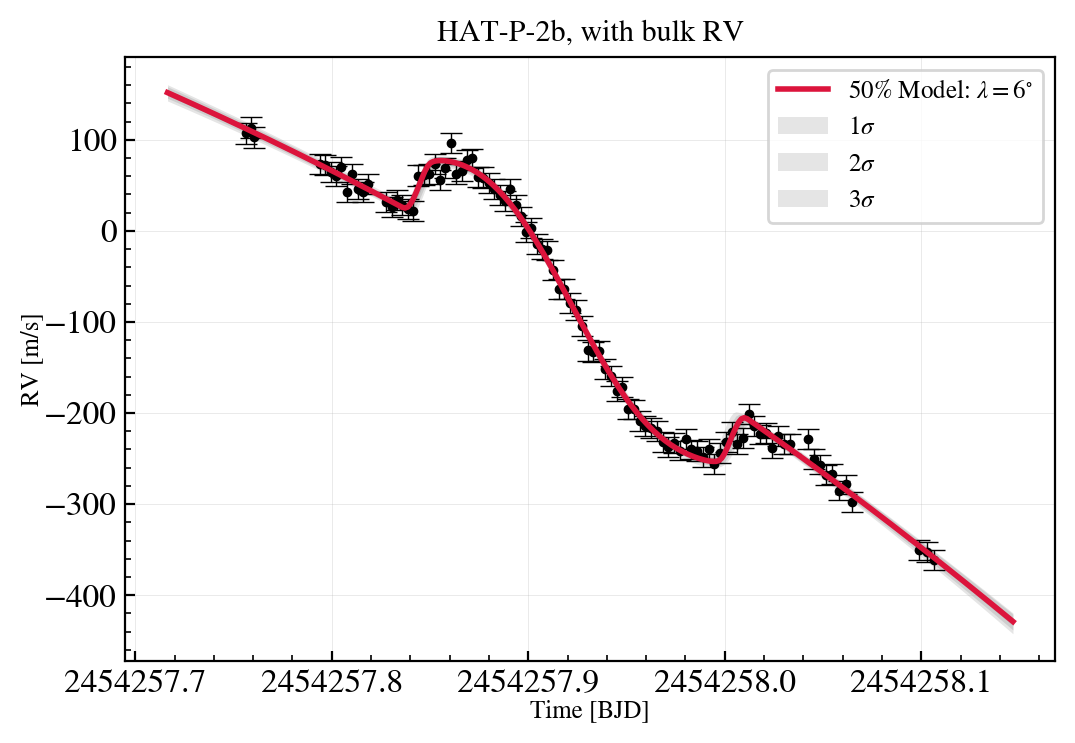

In [17]:
TITLE = 'HAT-P-2b, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax)